#  <font style = "color:rgb(139,0,0)">Neural Networks : Project 1 - Part 1 & Part 2</font> 

#  <font style = "color:rgb(139,0,0)">Neural Networks : Project 1 - Part 1 </font>  

DOMAIN: Electronics and Telecommunication
• CONTEXT: A communications equipment manufacturing company has a product which is responsible for emitting
informative signals. Company wants to build a machine learning model which can help the company to predict the
equipment’s signal quality using various parameters.
• DATA DESCRIPTION: The data set contains information on various signal tests performed:
1. Parameters: Various measurable signal parameters.
2. Signal_Quality: Final signal strength or quality
• PROJECT OBJECTIVE: The need is to build a regressor which can use these parameters to determine the signal strength or
quality [as number].
Steps and tasks: [ Total Score: 10 points]
1. Import data.
2. Data analysis & visualisation
• Perform relevant and detailed statistical analysis on the data.
• Perform relevant and detailed uni, bi and multi variate analysis.
Hint: Use your best analytical approach. Even you can mix match columns to create new columns which can be used for better
analysis. Create your own features if required. Be highly experimental and analytical here to find relevant hidden patterns.
3. Design, train, tune and test a neural network regressor.
Hint: Use best approach to refine and tune the data or the model. Be highly experimental here.
4. Pickle the model for future use.

### <font style = "color:rgb(139,0,0)">Importing data</font>  

In [25]:
import numpy as np     
import pandas as pd     
db = pd.read_csv(r"C:\Users\DELL\Signal.csv",sep=",")  
db.head()  

,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11,Signal_Strength
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


### <font style = "color:rgb(139,0,0)">Data analysis & visualisation</font>     

In [26]:
# Shape and size
print("Shape:",db.shape)
print("\nColumns:",db.shape[0])
print("\nRows:",db.shape[1])
print("\nSize:",db.size)

Shape: (1599, 12)

Columns: 1599

Rows: 12

Size: 19188


In [27]:
#detecting null values
db.isna().sum()

Parameter 1        0
Parameter 2        0
Parameter 3        0
Parameter 4        0
Parameter 5        0
Parameter 6        0
Parameter 7        0
Parameter 8        0
Parameter 9        0
Parameter 10       0
Parameter 11       0
Signal_Strength    0
dtype: int64

In [28]:
#description of the data
db.describe().T

,count,mean,std,min,25%,50%,75%,max
Parameter 1,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
Parameter 2,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
Parameter 3,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
Parameter 4,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
Parameter 5,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
Parameter 6,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
Parameter 7,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
Parameter 8,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
Parameter 9,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
Parameter 10,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


In [29]:
CORRELATION=db.corr()
CORRELATION

,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11,Signal_Strength
Parameter 1,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
Parameter 2,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
Parameter 3,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
Parameter 4,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
Parameter 5,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
Parameter 6,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
Parameter 7,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
Parameter 8,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
Parameter 9,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
Parameter 10,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


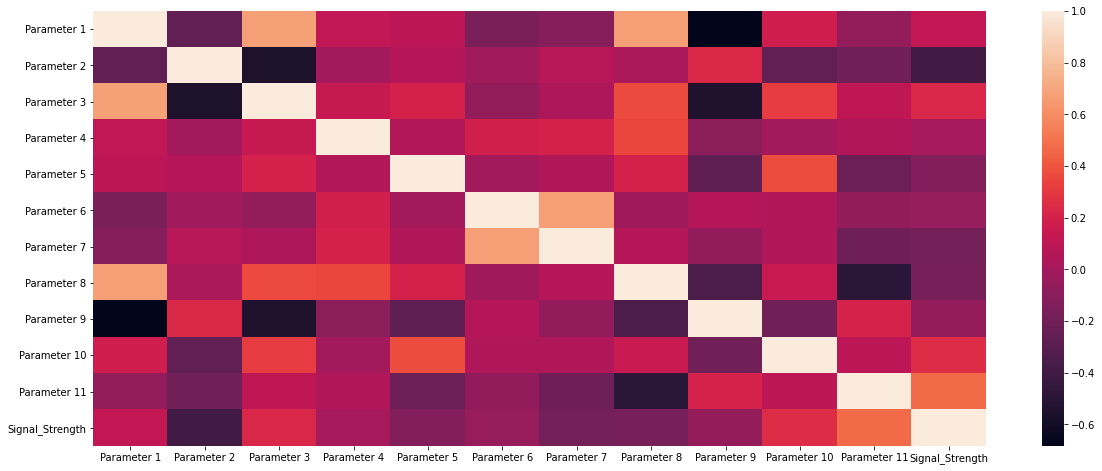

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.subplots(figsize=(20,8))
sns.heatmap(CORRELATION)
plt.show()

 - We should perform a detail univariate, bivariate and multivariate analysis here.   

[0.07692904 0.09593647 0.08103853 0.07812703 0.07717972 0.07439068
 0.10357433 0.08402689 0.07545472 0.1025972  0.15074538]


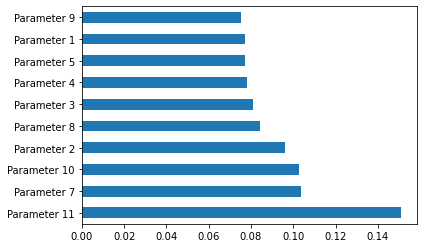

In [31]:
# analysing feature importance in data

X=db.drop('Signal_Strength',axis=1)      
Y=db['Signal_Strength']                

from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,Y)
print(model.feature_importances_) 
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

###  <font style = "color:rgb(139,0,0)"> Designing, training, tuning and testing a neural network regressor. </font>     


In [32]:
import sklearn
from sklearn.model_selection import train_test_split
X=db.drop('Signal_Strength',axis=1)   
Y=db['Signal_Strength']               
X_Train,X_Test,Y_Train,Y_Test=train_test_split(X, Y, train_size=0.7, random_state=12)

In [33]:
from sklearn.preprocessing import StandardScaler
X_Train_S = StandardScaler().fit_transform(X_Train)  
X_Test_S = StandardScaler().fit_transform(X_Test)    

In [34]:
#size of the matrix
print(X_Train_S.shape)
print(X_Test_S.shape)
print(Y_Train.shape)
print(Y_Test.shape)

(1119, 11)
(480, 11)
(1119,)
(480,)


In [35]:
from tensorflow import keras
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, Activation, LeakyReLU
from tensorflow.keras import optimizers

In [36]:
NN_model_Regressor = Sequential()

# The Input Layer :
NN_model_Regressor.add(Dense(128, kernel_initializer='normal',input_dim = X_Train.shape[1], activation='relu'))

# The Hidden Layers :
NN_model_Regressor.add(Dense(64, kernel_initializer='normal',activation='relu'))

NN_model_Regressor.add(Dense(32, kernel_initializer='normal'))
NN_model_Regressor.add(LeakyReLU(alpha=0.1))

NN_model_Regressor.add(Dense(16, kernel_initializer='normal'))
NN_model_Regressor.add(LeakyReLU(alpha=0.1))


# The Output Layer :
NN_model_Regressor.add(Dense(1, kernel_initializer='normal'))  
NN_model_Regressor.add(LeakyReLU(alpha=0.1))

# Compile the network :
NN_model_Regressor.compile(loss='mean_absolute_error', optimizer='adam', metrics=['accuracy'])
NN_model_Regressor.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 128)               1536      
_________________________________________________________________
dense_6 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_7 (Dense)              (None, 32)                2080      
_________________________________________________________________
leaky_re_lu_3 (LeakyReLU)    (None, 32)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 16)                528       
_________________________________________________________________
leaky_re_lu_4 (LeakyReLU)    (None, 16)                0         
_________________________________________________________________
dense_9 (Dense)              (None, 1)                

In [54]:
EPOCH=400
Network_Regressor=NN_model_Regressor.fit(X_Train_S, Y_Train, validation_data=(X_Test_S,Y_Test), epochs=EPOCH, batch_size=100)

Epoch 1/400
12/12 [==============================] - 0s 10ms/step - loss: 0.1112 - accuracy: 0.8889 - val_loss: 0.1111 - val_accuracy: 0.8889
Epoch 2/400
12/12 [==============================] - 0s 7ms/step - loss: 0.1112 - accuracy: 0.8889 - val_loss: 0.1112 - val_accuracy: 0.8889
Epoch 3/400
12/12 [==============================] - 0s 5ms/step - loss: 0.1112 - accuracy: 0.8889 - val_loss: 0.1112 - val_accuracy: 0.8889
Epoch 4/400
12/12 [==============================] - 0s 5ms/step - loss: 0.1112 - accuracy: 0.8889 - val_loss: 0.1111 - val_accuracy: 0.8889
Epoch 5/400
12/12 [==============================] - 0s 5ms/step - loss: 0.1112 - accuracy: 0.8889 - val_loss: 0.1111 - val_accuracy: 0.8889
Epoch 6/400
12/12 [==============================] - 0s 5ms/step - loss: 0.1112 - accuracy: 0.8889 - val_loss: 0.1112 - val_accuracy: 0.8889
Epoch 7/400
12/12 [==============================] - 0s 5ms/step - loss: 0.1112 - accuracy: 0.8889 - val_loss: 0.1112 - val_accuracy: 0.8889
Epoch 8/400


Epoch 59/400
12/12 [==============================] - 0s 5ms/step - loss: 0.1113 - accuracy: 0.8889 - val_loss: 0.1114 - val_accuracy: 0.8889
Epoch 60/400
12/12 [==============================] - 0s 5ms/step - loss: 0.1112 - accuracy: 0.8889 - val_loss: 0.1112 - val_accuracy: 0.8889
Epoch 61/400
12/12 [==============================] - 0s 5ms/step - loss: 0.1112 - accuracy: 0.8889 - val_loss: 0.1113 - val_accuracy: 0.8889
Epoch 62/400
12/12 [==============================] - 0s 5ms/step - loss: 0.1112 - accuracy: 0.8889 - val_loss: 0.1112 - val_accuracy: 0.8889
Epoch 63/400
12/12 [==============================] - 0s 5ms/step - loss: 0.1112 - accuracy: 0.8889 - val_loss: 0.1112 - val_accuracy: 0.8889
Epoch 64/400
12/12 [==============================] - 0s 5ms/step - loss: 0.1112 - accuracy: 0.8889 - val_loss: 0.1111 - val_accuracy: 0.8889
Epoch 65/400
12/12 [==============================] - 0s 5ms/step - loss: 0.1112 - accuracy: 0.8889 - val_loss: 0.1112 - val_accuracy: 0.8889
Epoch 

12/12 [==============================] - 0s 5ms/step - loss: 0.1112 - accuracy: 0.8889 - val_loss: 0.1112 - val_accuracy: 0.8889
Epoch 117/400
12/12 [==============================] - 0s 5ms/step - loss: 0.1112 - accuracy: 0.8889 - val_loss: 0.1114 - val_accuracy: 0.8889
Epoch 118/400
12/12 [==============================] - 0s 5ms/step - loss: 0.1113 - accuracy: 0.8889 - val_loss: 0.1113 - val_accuracy: 0.8889
Epoch 119/400
12/12 [==============================] - 0s 6ms/step - loss: 0.1113 - accuracy: 0.8889 - val_loss: 0.1113 - val_accuracy: 0.8889
Epoch 120/400
12/12 [==============================] - 0s 6ms/step - loss: 0.1112 - accuracy: 0.8889 - val_loss: 0.1113 - val_accuracy: 0.8889
Epoch 121/400
12/12 [==============================] - 0s 6ms/step - loss: 0.1112 - accuracy: 0.8889 - val_loss: 0.1113 - val_accuracy: 0.8889
Epoch 122/400
12/12 [==============================] - 0s 5ms/step - loss: 0.1113 - accuracy: 0.8889 - val_loss: 0.1113 - val_accuracy: 0.8889
Epoch 123/400

12/12 [==============================] - 0s 5ms/step - loss: 0.1112 - accuracy: 0.8889 - val_loss: 0.1112 - val_accuracy: 0.8889
Epoch 174/400
12/12 [==============================] - 0s 5ms/step - loss: 0.1112 - accuracy: 0.8889 - val_loss: 0.1111 - val_accuracy: 0.8889
Epoch 175/400
12/12 [==============================] - 0s 7ms/step - loss: 0.1112 - accuracy: 0.8889 - val_loss: 0.1112 - val_accuracy: 0.8889
Epoch 176/400
12/12 [==============================] - 0s 7ms/step - loss: 0.1112 - accuracy: 0.8889 - val_loss: 0.1111 - val_accuracy: 0.8889
Epoch 177/400
12/12 [==============================] - 0s 6ms/step - loss: 0.1112 - accuracy: 0.8889 - val_loss: 0.1112 - val_accuracy: 0.8889
Epoch 178/400
12/12 [==============================] - 0s 7ms/step - loss: 0.1112 - accuracy: 0.8889 - val_loss: 0.1111 - val_accuracy: 0.8889
Epoch 179/400
12/12 [==============================] - 0s 5ms/step - loss: 0.1112 - accuracy: 0.8889 - val_loss: 0.1111 - val_accuracy: 0.8889
Epoch 180/400

12/12 [==============================] - 0s 6ms/step - loss: 0.1112 - accuracy: 0.8889 - val_loss: 0.1112 - val_accuracy: 0.8889
Epoch 231/400
12/12 [==============================] - 0s 6ms/step - loss: 0.1111 - accuracy: 0.8889 - val_loss: 0.1112 - val_accuracy: 0.8889
Epoch 232/400
12/12 [==============================] - 0s 7ms/step - loss: 0.1112 - accuracy: 0.8889 - val_loss: 0.1112 - val_accuracy: 0.8889
Epoch 233/400
12/12 [==============================] - 0s 6ms/step - loss: 0.1113 - accuracy: 0.8889 - val_loss: 0.1113 - val_accuracy: 0.8889
Epoch 234/400
12/12 [==============================] - 0s 6ms/step - loss: 0.1112 - accuracy: 0.8889 - val_loss: 0.1112 - val_accuracy: 0.8889
Epoch 235/400
12/12 [==============================] - 0s 5ms/step - loss: 0.1112 - accuracy: 0.8889 - val_loss: 0.1113 - val_accuracy: 0.8889
Epoch 236/400
12/12 [==============================] - 0s 7ms/step - loss: 0.1113 - accuracy: 0.8889 - val_loss: 0.1112 - val_accuracy: 0.8889
Epoch 237/400

12/12 [==============================] - 0s 6ms/step - loss: 0.1112 - accuracy: 0.8889 - val_loss: 0.1112 - val_accuracy: 0.8889
Epoch 288/400
12/12 [==============================] - 0s 5ms/step - loss: 0.1112 - accuracy: 0.8889 - val_loss: 0.1112 - val_accuracy: 0.8889
Epoch 289/400
12/12 [==============================] - 0s 5ms/step - loss: 0.1112 - accuracy: 0.8889 - val_loss: 0.1111 - val_accuracy: 0.8889
Epoch 290/400
12/12 [==============================] - 0s 5ms/step - loss: 0.1112 - accuracy: 0.8889 - val_loss: 0.1111 - val_accuracy: 0.8889
Epoch 291/400
12/12 [==============================] - 0s 5ms/step - loss: 0.1112 - accuracy: 0.8889 - val_loss: 0.1112 - val_accuracy: 0.8889
Epoch 292/400
12/12 [==============================] - 0s 5ms/step - loss: 0.1112 - accuracy: 0.8889 - val_loss: 0.1112 - val_accuracy: 0.8889
Epoch 293/400
12/12 [==============================] - 0s 5ms/step - loss: 0.1112 - accuracy: 0.8889 - val_loss: 0.1111 - val_accuracy: 0.8889
Epoch 294/400

12/12 [==============================] - 0s 5ms/step - loss: 0.1112 - accuracy: 0.8889 - val_loss: 0.1111 - val_accuracy: 0.8889
Epoch 345/400
12/12 [==============================] - 0s 5ms/step - loss: 0.1112 - accuracy: 0.8889 - val_loss: 0.1112 - val_accuracy: 0.8889
Epoch 346/400
12/12 [==============================] - 0s 5ms/step - loss: 0.1112 - accuracy: 0.8889 - val_loss: 0.1114 - val_accuracy: 0.8889
Epoch 347/400
12/12 [==============================] - 0s 5ms/step - loss: 0.1113 - accuracy: 0.8889 - val_loss: 0.1111 - val_accuracy: 0.8889
Epoch 348/400
12/12 [==============================] - 0s 5ms/step - loss: 0.1112 - accuracy: 0.8889 - val_loss: 0.1112 - val_accuracy: 0.8889
Epoch 349/400
12/12 [==============================] - 0s 5ms/step - loss: 0.1112 - accuracy: 0.8889 - val_loss: 0.1113 - val_accuracy: 0.8889
Epoch 350/400
12/12 [==============================] - 0s 5ms/step - loss: 0.1113 - accuracy: 0.8889 - val_loss: 0.1112 - val_accuracy: 0.8889
Epoch 351/400

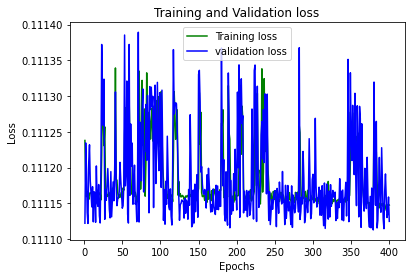

In [55]:
loss_train = Network_Regressor.history['loss']
loss_val = Network_Regressor.history['val_loss']
epochs = range(1,EPOCH+1)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

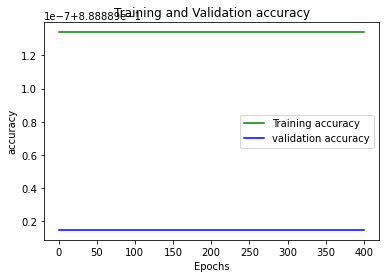

In [56]:
Acc_train = Network_Regressor.history['accuracy']
Acc_val = Network_Regressor.history['val_accuracy']
epochs = range(1,EPOCH+1)
plt.plot(epochs, Acc_train, 'g', label='Training accuracy')
plt.plot(epochs, Acc_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

###   <font style = "color:rgb(139,0,0)">   Pickling the model for future use. </font>     


In [57]:
from keras.models import model_from_json
import numpy
import os

# Pickling the model to JSON
Regressor_model_json = NN_model_Regressor.to_json()
with open("Regressor_model.json", "w") as json_file:
    json_file.write(Regressor_model_json)
# Pickling weights to HDF5
NN_model_Regressor.save_weights("Regressor_model.h5")
print("Saved model to disk")


# loading json and creating model
json_file = open('Regressor_model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# loading weights into new model
loaded_model.load_weights("Regressor_model.h5")
print("Loaded model from disk")

# Evaluating
loaded_model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
score = loaded_model.evaluate(X_Test_S,Y_Test, verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

Saved model to disk
Loaded model from disk
accuracy: 88.89%


# <font style = "color:rgb(139,0,0)">Neural Networks : Project 1 - Part 2</font>     

• DOMAIN: Electronics and Telecommunication
• CONTEXT: A communications equipment manufacturing company has a product which is responsible for emitting
informative signals. Company wants to build a deep learning model which can help the company to predict the equipment’s
signal quality using various parameters.
• DATA DESCRIPTION: The data set contains information on various signal tests performed:
1. Parameters: Various measurable signal parameters.
2. Signal_Quality: Final signal strength or quality
• PROJECT OBJECTIVE: The need is to build a classifier which can use these parameters to determine the signal strength or
quality [as number].
Steps and tasks: [ Total Score: 10 points]
1. Import data
2. Data analysis & visualisation
• Perform relevant and detailed statistical analysis on the data.
• Perform relevant and detailed uni, bi and multi variate analysis.
Hint: Use your best analytical approach. Even you can mix match columns to create new columns which can be used for better
analysis. Create your own features if required. Be highly experimental and analytical here to find hidden patterns.
3. Design, train, tune and test a neural network classifier..
Hint: Use best approach to refine and tune the data or the model. Be highly experimental here.
4. Pickle the model for future use

In [41]:
# Converting y data into categorical value by one-hot encoding
from keras.utils.np_utils import to_categorical
Y_Train = to_categorical(Y_Train)
Y_Test = to_categorical(Y_Test)

In [42]:
# size of the matrix
print(X_Train_S.shape)
print(X_Test_S.shape)
print(Y_Train.shape)
print(Y_Test.shape)

(1119, 11)
(480, 11)
(1119, 9)
(480, 9)


In [43]:
from keras.models import Sequential
from keras.layers import Dense, Activation, LeakyReLU
from keras import optimizers

In [44]:
NN_model_Classifier = Sequential()

# The Input Layer :
NN_model_Classifier.add(Dense(128, kernel_initializer='normal',input_dim = X_Train.shape[1], activation='relu'))

# The Hidden Layers :
NN_model_Classifier.add(Dense(64, kernel_initializer='normal',activation='relu'))  

NN_model_Classifier.add(Dense(32, kernel_initializer='normal'))
NN_model_Classifier.add(LeakyReLU(alpha=0.1))

NN_model_Classifier.add(Dense(16, kernel_initializer='normal'))
NN_model_Classifier.add(LeakyReLU(alpha=0.1))


# The Output Layer :
NN_model_Classifier.add(Dense(9, kernel_initializer='normal',activation='softmax'))  

# Compile the network :
NN_model_Classifier.compile(loss='mean_absolute_error', optimizer='adam', metrics=['accuracy'])
NN_model_Classifier.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 128)               1536      
_________________________________________________________________
dense_6 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_7 (Dense)              (None, 32)                2080      
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 32)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 16)                528       
_________________________________________________________________
leaky_re_lu_3 (LeakyReLU)    (None, 16)                0         
_________________________________________________________________
dense_9 (Dense)              (None, 9)                

In [49]:
EPOCH=400
Network_Classifier=NN_model_Classifier.fit(X_Train_S, Y_Train, validation_data=(X_Test_S,Y_Test), epochs=EPOCH, batch_size=200)

Epoch 1/400
6/6 [==============================] - 0s 19ms/step - loss: 0.0781 - accuracy: 0.6488 - val_loss: 0.0861 - val_accuracy: 0.6125
Epoch 2/400
6/6 [==============================] - 0s 10ms/step - loss: 0.0781 - accuracy: 0.6488 - val_loss: 0.0861 - val_accuracy: 0.6125
Epoch 3/400
6/6 [==============================] - 0s 10ms/step - loss: 0.0781 - accuracy: 0.6488 - val_loss: 0.0861 - val_accuracy: 0.6125
Epoch 4/400
6/6 [==============================] - 0s 9ms/step - loss: 0.0781 - accuracy: 0.6488 - val_loss: 0.0862 - val_accuracy: 0.6125
Epoch 5/400
6/6 [==============================] - 0s 11ms/step - loss: 0.0781 - accuracy: 0.6488 - val_loss: 0.0862 - val_accuracy: 0.6125
Epoch 6/400
6/6 [==============================] - 0s 8ms/step - loss: 0.0781 - accuracy: 0.6488 - val_loss: 0.0862 - val_accuracy: 0.6125
Epoch 7/400
6/6 [==============================] - 0s 9ms/step - loss: 0.0781 - accuracy: 0.6488 - val_loss: 0.0862 - val_accuracy: 0.6125
Epoch 8/400
6/6 [======

6/6 [==============================] - 0s 9ms/step - loss: 0.0781 - accuracy: 0.6488 - val_loss: 0.0862 - val_accuracy: 0.6125
Epoch 60/400
6/6 [==============================] - 0s 9ms/step - loss: 0.0781 - accuracy: 0.6488 - val_loss: 0.0861 - val_accuracy: 0.6104
Epoch 61/400
6/6 [==============================] - 0s 8ms/step - loss: 0.0781 - accuracy: 0.6488 - val_loss: 0.0861 - val_accuracy: 0.6104
Epoch 62/400
6/6 [==============================] - 0s 7ms/step - loss: 0.0781 - accuracy: 0.6488 - val_loss: 0.0862 - val_accuracy: 0.6125
Epoch 63/400
6/6 [==============================] - 0s 8ms/step - loss: 0.0781 - accuracy: 0.6488 - val_loss: 0.0863 - val_accuracy: 0.6125
Epoch 64/400
6/6 [==============================] - 0s 8ms/step - loss: 0.0781 - accuracy: 0.6488 - val_loss: 0.0862 - val_accuracy: 0.6125
Epoch 65/400
6/6 [==============================] - 0s 9ms/step - loss: 0.0781 - accuracy: 0.6488 - val_loss: 0.0861 - val_accuracy: 0.6104
Epoch 66/400
6/6 [===============

6/6 [==============================] - 0s 9ms/step - loss: 0.0780 - accuracy: 0.6488 - val_loss: 0.0862 - val_accuracy: 0.6125
Epoch 118/400
6/6 [==============================] - 0s 9ms/step - loss: 0.0780 - accuracy: 0.6488 - val_loss: 0.0862 - val_accuracy: 0.6125
Epoch 119/400
6/6 [==============================] - 0s 8ms/step - loss: 0.0780 - accuracy: 0.6488 - val_loss: 0.0862 - val_accuracy: 0.6125
Epoch 120/400
6/6 [==============================] - 0s 8ms/step - loss: 0.0780 - accuracy: 0.6488 - val_loss: 0.0862 - val_accuracy: 0.6125
Epoch 121/400
6/6 [==============================] - 0s 9ms/step - loss: 0.0780 - accuracy: 0.6488 - val_loss: 0.0862 - val_accuracy: 0.6125
Epoch 122/400
6/6 [==============================] - 0s 7ms/step - loss: 0.0780 - accuracy: 0.6488 - val_loss: 0.0861 - val_accuracy: 0.6104
Epoch 123/400
6/6 [==============================] - 0s 9ms/step - loss: 0.0780 - accuracy: 0.6488 - val_loss: 0.0861 - val_accuracy: 0.6104
Epoch 124/400
6/6 [========

6/6 [==============================] - 0s 9ms/step - loss: 0.0780 - accuracy: 0.6488 - val_loss: 0.0862 - val_accuracy: 0.6104
Epoch 176/400
6/6 [==============================] - 0s 8ms/step - loss: 0.0780 - accuracy: 0.6488 - val_loss: 0.0862 - val_accuracy: 0.6125
Epoch 177/400
6/6 [==============================] - 0s 8ms/step - loss: 0.0780 - accuracy: 0.6488 - val_loss: 0.0862 - val_accuracy: 0.6104
Epoch 178/400
6/6 [==============================] - 0s 8ms/step - loss: 0.0780 - accuracy: 0.6488 - val_loss: 0.0862 - val_accuracy: 0.6104
Epoch 179/400
6/6 [==============================] - 0s 7ms/step - loss: 0.0780 - accuracy: 0.6488 - val_loss: 0.0862 - val_accuracy: 0.6104
Epoch 180/400
6/6 [==============================] - 0s 8ms/step - loss: 0.0780 - accuracy: 0.6488 - val_loss: 0.0862 - val_accuracy: 0.6125
Epoch 181/400
6/6 [==============================] - 0s 9ms/step - loss: 0.0780 - accuracy: 0.6488 - val_loss: 0.0863 - val_accuracy: 0.6125
Epoch 182/400
6/6 [========

6/6 [==============================] - 0s 9ms/step - loss: 0.0780 - accuracy: 0.6488 - val_loss: 0.0862 - val_accuracy: 0.6104
Epoch 234/400
6/6 [==============================] - 0s 9ms/step - loss: 0.0780 - accuracy: 0.6488 - val_loss: 0.0862 - val_accuracy: 0.6104
Epoch 235/400
6/6 [==============================] - 0s 8ms/step - loss: 0.0780 - accuracy: 0.6488 - val_loss: 0.0862 - val_accuracy: 0.6104
Epoch 236/400
6/6 [==============================] - 0s 8ms/step - loss: 0.0780 - accuracy: 0.6488 - val_loss: 0.0862 - val_accuracy: 0.6104
Epoch 237/400
6/6 [==============================] - 0s 8ms/step - loss: 0.0780 - accuracy: 0.6488 - val_loss: 0.0862 - val_accuracy: 0.6104
Epoch 238/400
6/6 [==============================] - 0s 9ms/step - loss: 0.0780 - accuracy: 0.6488 - val_loss: 0.0862 - val_accuracy: 0.6104
Epoch 239/400
6/6 [==============================] - 0s 9ms/step - loss: 0.0780 - accuracy: 0.6488 - val_loss: 0.0862 - val_accuracy: 0.6104
Epoch 240/400
6/6 [========

6/6 [==============================] - 0s 11ms/step - loss: 0.0780 - accuracy: 0.6488 - val_loss: 0.0862 - val_accuracy: 0.6125
Epoch 292/400
6/6 [==============================] - 0s 11ms/step - loss: 0.0780 - accuracy: 0.6488 - val_loss: 0.0863 - val_accuracy: 0.6125
Epoch 293/400
6/6 [==============================] - 0s 11ms/step - loss: 0.0780 - accuracy: 0.6488 - val_loss: 0.0862 - val_accuracy: 0.6104
Epoch 294/400
6/6 [==============================] - 0s 10ms/step - loss: 0.0780 - accuracy: 0.6488 - val_loss: 0.0862 - val_accuracy: 0.6125
Epoch 295/400
6/6 [==============================] - 0s 8ms/step - loss: 0.0780 - accuracy: 0.6488 - val_loss: 0.0862 - val_accuracy: 0.6125
Epoch 296/400
6/6 [==============================] - 0s 8ms/step - loss: 0.0780 - accuracy: 0.6488 - val_loss: 0.0862 - val_accuracy: 0.6104
Epoch 297/400
6/6 [==============================] - ETA: 0s - loss: 0.0711 - accuracy: 0.68 - 0s 10ms/step - loss: 0.0780 - accuracy: 0.6488 - val_loss: 0.0862 - v

Epoch 349/400
6/6 [==============================] - 0s 10ms/step - loss: 0.0780 - accuracy: 0.6488 - val_loss: 0.0862 - val_accuracy: 0.6125
Epoch 350/400
6/6 [==============================] - 0s 9ms/step - loss: 0.0780 - accuracy: 0.6488 - val_loss: 0.0863 - val_accuracy: 0.6125
Epoch 351/400
6/6 [==============================] - 0s 8ms/step - loss: 0.0780 - accuracy: 0.6488 - val_loss: 0.0862 - val_accuracy: 0.6125
Epoch 352/400
6/6 [==============================] - 0s 7ms/step - loss: 0.0780 - accuracy: 0.6488 - val_loss: 0.0862 - val_accuracy: 0.6125
Epoch 353/400
6/6 [==============================] - 0s 8ms/step - loss: 0.0780 - accuracy: 0.6488 - val_loss: 0.0862 - val_accuracy: 0.6125
Epoch 354/400
6/6 [==============================] - 0s 8ms/step - loss: 0.0780 - accuracy: 0.6488 - val_loss: 0.0862 - val_accuracy: 0.6125
Epoch 355/400
6/6 [==============================] - 0s 9ms/step - loss: 0.0780 - accuracy: 0.6488 - val_loss: 0.0862 - val_accuracy: 0.6125
Epoch 356/40

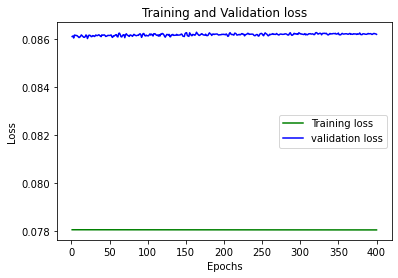

In [50]:
loss_train = Network_Classifier.history['loss']
loss_val = Network_Classifier.history['val_loss']
epochs = range(1,EPOCH+1)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

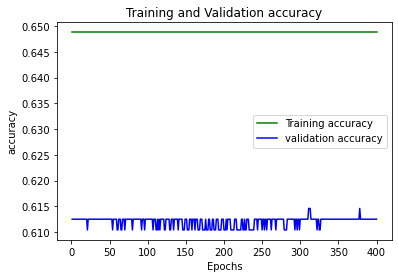

In [51]:
Acc_train = Network_Classifier.history['accuracy']
Acc_val = Network_Classifier.history['val_accuracy']
epochs = range(1,EPOCH+1)
plt.plot(epochs, Acc_train, 'g', label='Training accuracy')
plt.plot(epochs, Acc_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [52]:
from keras.models import model_from_json
import numpy
import os

# Picking the model to JSON
Classifier_model_json = NN_model_Classifier.to_json()
with open("Classifier_model.json", "w") as json_file:
    json_file.write(Classifier_model_json)
# Pickling weights to HDF5
NN_model_Classifier.save_weights("Classifier_model.h5")
print("Saved model to disk")


# loading json and creating model
json_file = open('Classifier_model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# loading weights into new model
loaded_model.load_weights("Classifier_model.h5")
print("Loaded model from disk")

# Evaluating
loaded_model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
score = loaded_model.evaluate(X_Test_S,Y_Test, verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

Saved model to disk
Loaded model from disk
accuracy: 61.25%
